## <font color='blue'>2.2 Discrete-time Linear Systems</font>

---

### <font color='blue'>Problem</font>

#### A. Self-Stabilizing Quadcopter UAV Using PID Control
Focus on the control systems aspects of the project including block diagram, system modeling, transfer function, PID controller, time response, root locus, bode plot, etc. Discussion of design, simulation, analysis, and challenges. https://www.youtube.com/watch?v=clyusOrMqbU

#### B. Modeling and Simulation of Advanced Amateur Rockets
This is an overview of the three phases of Modeling and Simulation that I use for rocket design. These steps take us from the start of the design process through to the flight test. https://www.youtube.com/watch?v=sEzRzkGRpDQ

### <font color='green'>Next: 2.3 transfer function to state-space </font>

___

### <font color='blue'>2.2 A. Discrete-time system</font>

The input and output of every discrete-time system will be assumed to have the same sampling period $T$ and will be denoted by $u[k] := u(kT )$, $y[k]:= y(kT )$, 
where $k$ is an integer ranging from−∞ to +∞. 

A discrete-time system is causal if the output depends on current and past inputs. 

The state at time $k_0$, denoted by $x[k_0]$, is the information at time instant $k_0$, which together with $u[k], k ≥ k_0$, 
determines uniquely the output $y[k], k ≥ k_0$. 

The entries of $x$ are called state variables. If the number of state variables is finite, the discrete-time system is lumped; 
otherwise, it is distributed. 

A discrete-time system is linear if the additivity and homogeneity properties hold. The response of every linear discrete-time system can be decomposed as

* Response = zero-state response + zero-input response *
    
The zero-state responses satisfy the superposition property. So do the zero-input responses.
#### Input–output description 
Let $δ[k]$ be the impulse sequence defined as
$$ \delta [k-m] = \left\{
\begin{aligned}
1, \text{if} \; k = m\\
0, \text{if} \; k \neq m
\end{aligned}
\right.$$

where both $k$ and $m$ are integers, denoting sampling instants. 
It is the discrete counterpart of the impulse $δ(t − t_1)$. 
The impulse $δ(t − t_1)$ has zero width and infinite height and cannot be generated in practice; 
whereas the impulse sequence $δ[k − m]$ can easily be generated. 
Let $u[k]$ be any input sequence. Then it can be expressed as

$$ u[k] = \sum_{m=-\infty}^{\infty} u[m]\delta[k-m]$$

Let $g[k,m]$ be the output at time instant $k$ excited by the impulse sequence applied at time instant $m$. Then we have
$$ \delta[k-m] \rightarrow g[k,m]$$
$$ \delta[k-m]u[m] \rightarrow g[k,m]u[m] \quad \text{(homogeneity)}$$
$$ \sum_m \delta[k-m]u[m] \rightarrow \sum_m g[k,m]u[m] \quad \text{(additivity)}$$
Thus the output $y[k]$ excited by the input $u[k]$ equals
$$ y[k] = \sum_{m=-\infty}^{\infty} g[k,m]u[m] \tag{1}$$

The sequence $g[k,m]$ is called the impulse response sequence. If a discrete-time system is causal, no output will appear before an input is applied. Thus
we have
$$\text{Causal} \Longleftrightarrow g[k,m]=0, \qquad \text{for} \; k < m $$
If a system is relaxed at $k_0$ and causal, then (1) can be reduced to
$$ y[k] = \sum_{m=k_0}^{k} g[k,m]u[m] \tag{2}$$

If a linear discrete-time system is also time-invariant, then the time-shifting property holds. 
In this case, the initial time instant can always be chosen as $k_0$ = 0 and (2) becomes
$$ y[k] = \sum_{m=0}^{k} g[k-m]u[m] = \sum_{m=0}^{k} g[m]u[k-m] \tag{3}$$

This is called a discrete convolution. The z-transform is an important tool in the study of LTI discrete-time systems. 
Let $\hat{y}(z)$ be the z-transform of $y[k]$ defined as
$$ \hat{y}(z) =  \mathcal{Z}\{y[k]\}:=\sum_{k=0}^{\infty} y[k]z^{-k} \tag{4}$$

We first replace the upper limit of the integration in (3) to ∞, and then substitute it into (4) to yield
\begin{equation}
\begin{split}
\hat{y}(z) &= \sum_{k=0}^{\infty} (\sum_{m=k_0}^{k} g[k,m]u[m]) z^{-k} \\
&= \sum_{k=0}^{\infty} (\sum_{m=k_0}^{k} g[k,m]z^{-k-m}) u[m] z^{-m} \\
&= (\sum_{l=0}^{\infty} g[l]z^{-l}) (\sum_{m=0}^{k} u[m] z^{-m}) =: \hat{g}(z) \hat{u}(z)
\end{split} \tag{5}
\end{equation} 

The function $\hat{g}(z)$ is *the z-transform of the impulse response sequence* $g[k]$ and is called the discrete transfer function. 
Both the discrete convolution and transfer functions describe only zero-state responses.

---
#### Example 1
Consider the unit-sampling-time delay system defined by 
$$y[k] = u[k − 1]$$

The output equals the input delayed by one sampling period. Its impulse response sequence is $g[k] = δ[k − 1]$ and its discrete transfer function is
$$ \hat {g}(z) = \mathcal{Z}[δ[k − 1]] = z^{−1} = \frac{1}{z} $$
It is a rational function of $z$. Note that every continuous-time system involving time delay is a distributed system. This is not so in discrete-time systems.

---
#### Example 2
<div style="text-align: center;">
    <img src="block-digarm.jpg" width="800" alt="Centered Image">
</div>

Consider the discrete-time feedback system. If the unit-sampling-time delay element is replaced by its transfer function $z−1$, 
then the block diagram becomes the one and the transfer function from $r$ to $y$ can be computed as
$$ \hat{g}(z) = \frac{a z^{−1}}{1 - a z^{−1}} = \frac{a}{z-a} $$

The transfer function can also be obtained by applying the z-transform to the impulse response sequence of the feedback system.
The impulse response sequence is

$$ g[k]=a\delta[k-1]+a^2\delta[k-2]+...=\sum_{m=1}^{\infty} \delta[k-m]$$

The z-transform of $δ[k − m]$ is $z^{−m}$. Thus, the transfer function of the feedback system is
$$ \hat{g}(z) = \mathcal{Z}\{g[k]\} = az^{-1} + a^2z^{-2}+...=az^{-1}\sum_{m=0}^{\infty}(az^{-1})^m =\frac{az^{-1}}{1-az^{-1}}$$

---
#### The Typical stat-space equations
Every linear lumped discrete-time system can be described by
$$ \mathbf{x}[k+1] = \mathbf{A}[k]\mathbf{x}[k] + \mathbf{B}[k] \mathbf{u}[k] \tag{6} $$
$$ \mathbf{y}[t] = \mathbf{C}[k] \mathbf{x}[k] + \mathbf{D}[k] \mathbf{u}[k] \tag{7} $$

where $A$, $B$, $C$, and $D$ are functions of $k$. If the system is time-invariant as well, then (1)(2) becomes
$$ \mathbf{x} [k+1] = \mathbf{A}\mathbf{x}[k] + \mathbf{B} \mathbf{u}[k] \tag{8} $$ 
$$ \mathbf{y}[t] = \mathbf{C} \mathbf{x}[k] + \mathbf{D} \mathbf{u}[k] \tag{9}　$$

where $A$, $B$, $C$, and $D$ are constant matrices. Let $\hat{x}(z)$be the z-transform of $x[k]$ or
$$ \hat{x}(z) = \mathcal{Z}\{x[k]\}:=\sum_{k=0}^{\infty} x[k]z^{-k} \tag{10}$$

Then we have
\begin{equation}\begin{split}
\mathcal{Z}\{x[k+1]\} &= \sum_{k=0}^{\infty} x[k+1]z^{-k} = z\sum_{k=0}^{\infty} x[k+1]z^{-(k+1)}\\
&= z[\sum_{l=1}^{\infty} x[l]z^{-l}+x[0]-x[0]] = z[\hat{x}(z) - x[0]]
\end{split}\end{equation}

Applying the z-transform to (8) and (9) yields
\begin{equation}\begin{split}
z\hat{\mathbf{x}} (z) - z\mathbf{x}[0] &= \mathbf{A}\hat{\mathbf{x}}(z) + \mathbf{B} \hat{\mathbf{u}}(z)  \\ 
\hat{\mathbf{y}}(z) &= \mathbf{C} \hat{\mathbf{x}}(z) + \mathbf{D} \hat{\mathbf{u}}(z)　
\end{split}\end{equation}

which implies
\begin{equation}\begin{split}
\hat{\mathbf{x}}(z) &= (z\mathbf{I} -\mathbf{A})^{-1} z\mathbf{x}[0] + (z\mathbf{I} -\mathbf{A})^{-1}\mathbf{B} \hat{\mathbf{u}}(z)  \\ 
\hat{\mathbf{y}}(z) &= \mathbf{C}(z\mathbf{I} -\mathbf{A})^{-1} z\mathbf{x}[0] + \mathbf{C}(z\mathbf{I} -\mathbf{A})^{-1} \mathbf{B} \hat{\mathbf{u}}(z) + \mathbf{D} \hat{\mathbf{u}}(z)
\end{split} \tag{11}\end{equation}

Note that there is an extra $z$ in front of $x[0]$. If $x[0]$ = 0, then (11) reduces to
\begin{equation}\begin{split}
\hat{\mathbf{x}}(z) &= (z\mathbf{I} -\mathbf{A})^{-1}\mathbf{B} \hat{\mathbf{u}}(z)  \\ 
\hat{\mathbf{y}}(z) &= [\mathbf{C}(z\mathbf{I} -\mathbf{A})^{-1} \mathbf{B} + \mathbf{D}] \hat{\mathbf{u}}(z)
\end{split} \tag{12}\end{equation}
The transfer function will be 
$$ \hat{\mathbf{G}}(z) = \mathbf{C}(z\mathbf{I} -\mathbf{A})^{-1} \mathbf{B} + \mathbf{D} \tag{13}$$

---
### <font color='blue'>2.2 B. What will happen when realizing in Python</font>

*Question: If A, B, C, and D are given, what are the time and frequency responses of the linear system?*

In [1]:
import numpy as np
import control as ctrl
import matplotlib.pyplot as plt

# Define state-space matrices
A = np.array([[0, 1], [-2, -3]])
B = np.array([[0], [1]])
C = np.array([[1, 0]])
D = np.array([[0]])

In [2]:
# Create state-space system
sys = ctrl.ss(A, B, C, D)

# Compute the step response
time, response = ctrl.step_response(sys)

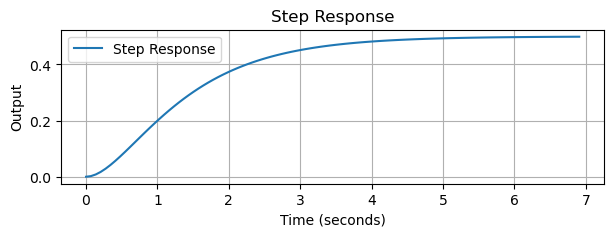

In [15]:
# Plot the step response
plt.figure()
plt.plot(time, response, label="Step Response")
plt.xlabel("Time (seconds)"); plt.ylabel("Output")
plt.title("Step Response"); plt.grid(True); plt.legend()
plt.rcParams["figure.figsize"] = (7, 3)
plt.show()

In [4]:
# Convert to transfer function
sys_tf = ctrl.ss2tf(sys)

# Display transfer function
print(sys_tf)

<TransferFunction>: sys[1]
Inputs (1): ['u[0]']
Outputs (1): ['y[0]']


      1
-------------
s^2 + 3 s + 2



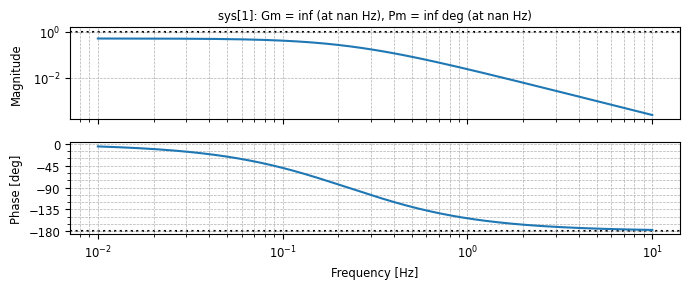

In [16]:
# If sys_tf is a MIMO system (a NumPy array), extract the first element
if isinstance(sys_tf, np.ndarray):
    sys_tf = sys_tf[0, 0]

# Generate Bode plot
ctrl.bode_plot(sys_tf, dB=False, Hz=True, deg=True, display_margins=True)
# Enable logarithmic grid for both magnitude and phase plots
for ax in plt.gcf().get_axes():  # Get all axes in the current figure
    ax.grid(True, which="both", linestyle="--", linewidth=0.5)  # Enable grid for both major and minor ticks
    ax.set_xscale("log")  # Ensure x-axis is logarithmic
plt.show()

### <font color='red'> Final Problem:</font>
1. What is the impulse response of the system of example 2, if $m$ = 1, $k_1$ = 3, $k_2$ = 2?
2. Can we extend to a bicycle model based on example 3? and how to do?  

Ref: https://hackmd.io/@CynthiaChuang/Basic-LaTeX-Commands